In [1]:
import os
import errno
import random
import shutil
import zipfile
import skimage.io as io

import numpy as np
from tensorflow.python import keras

from deepcell.utils.data_utils import make_training_data
from deepcell.utils.data_utils import get_data
from deepcell.utils.io_utils import get_image_sizes
from deepcell.utils.export_utils import export_model
from deepcell.utils.train_utils import rate_scheduler
from deepcell.model_zoo import bn_feature_net_2D
from deepcell.model_zoo import bn_feature_net_skip_2D
from deepcell.training import train_model_sample
import matplotlib.pyplot as plt

/usr/local/lib/python3.5/dist-packages/deepcell/utils/__init__.py:49: UserWarning: To use `compute_overlap`, the C extensions must be built using `python setup.py build_ext --inplace`
  warnings.warn('To use `compute_overlap`, the C extensions must be built '


In [2]:
CHANNEL_AXIS = 3
training_data = np.load(os.path.join('/data/npz_data', 
                                     "Point1_12_18_23_3X_interior_border_border" + ".npz"))

X, y = training_data["X"], training_data["y"]
print("X.shape: {} & y.shape: {}".format(X.shape, y.shape))


X.shape: (4, 1024, 1024, 3) & y.shape: (4, 1024, 1024, 1)


In [18]:
hist = np.load('/data/models/20190525_class_balance/Point1_12_18_3X_interior_border_border_3_class_300k_max_class_examples_balanced_16_conv_filters.npz')
hist['loss_history'].tolist()['acc']

[0.76314473585546,
 0.7717249248241782,
 0.7740364618248686,
 0.7751138153540624,
 0.7768423540859183,
 0.7780288067064994,
 0.7792220780189459,
 0.7801232819731497,
 0.7810188036835454,
 0.7821222955352597,
 0.7835360379295756,
 0.7838997015686622,
 0.7848497728244128,
 0.785332763594175,
 0.7861055488245754,
 0.7870283453083936,
 0.7881988876433041,
 0.7885409587538602,
 0.7890978186994969,
 0.790535426520219,
 0.7909695499895183,
 0.7945345900937152,
 0.8036011791797539,
 0.8082640288923987,
 0.8124950280370065,
 0.8168953580602681,
 0.819868308305212,
 0.8228446678956822,
 0.8264028893082845,
 0.8303475033357484,
 0.833615930285816,
 0.8371571049649614,
 0.8396891130473858,
 0.8417869976605108,
 0.8423824968694897,
 0.8445076562553601,
 0.8456122845568926,
 0.8470748942537036,
 0.8481772496568187,
 0.8487454740915623]

In [34]:
MODEL_NAME = 'Point1_12_18_3X_interior_border_border' + '_4_class_128_filters_240k_unbalanced_epoch_50'
weights_path = os.path.join('/data/models/20190606_params', 
                            MODEL_NAME + ".h5")

In [35]:
# Load the previously generated weights
# from deepcell import model_zoo

run_sample_model = bn_feature_net_2D(
    n_dense_filters=128,
    n_conv_filters=128,
    dilated=True,
    n_features=4,
    norm_method='std',
    receptive_field=61,
    n_channels=3,    
    input_shape=tuple(X.shape[1:]))

run_sample_model.load_weights(weights_path)

In [36]:
test_images = run_sample_model.predict(X[:, :, :, :])

print('model output shape:', test_images.shape)

model output shape: (4, 1024, 1024, 4)


In [32]:
np.save('/data/models/20190606_params/' + MODEL_NAME + '_metrics', test_images)

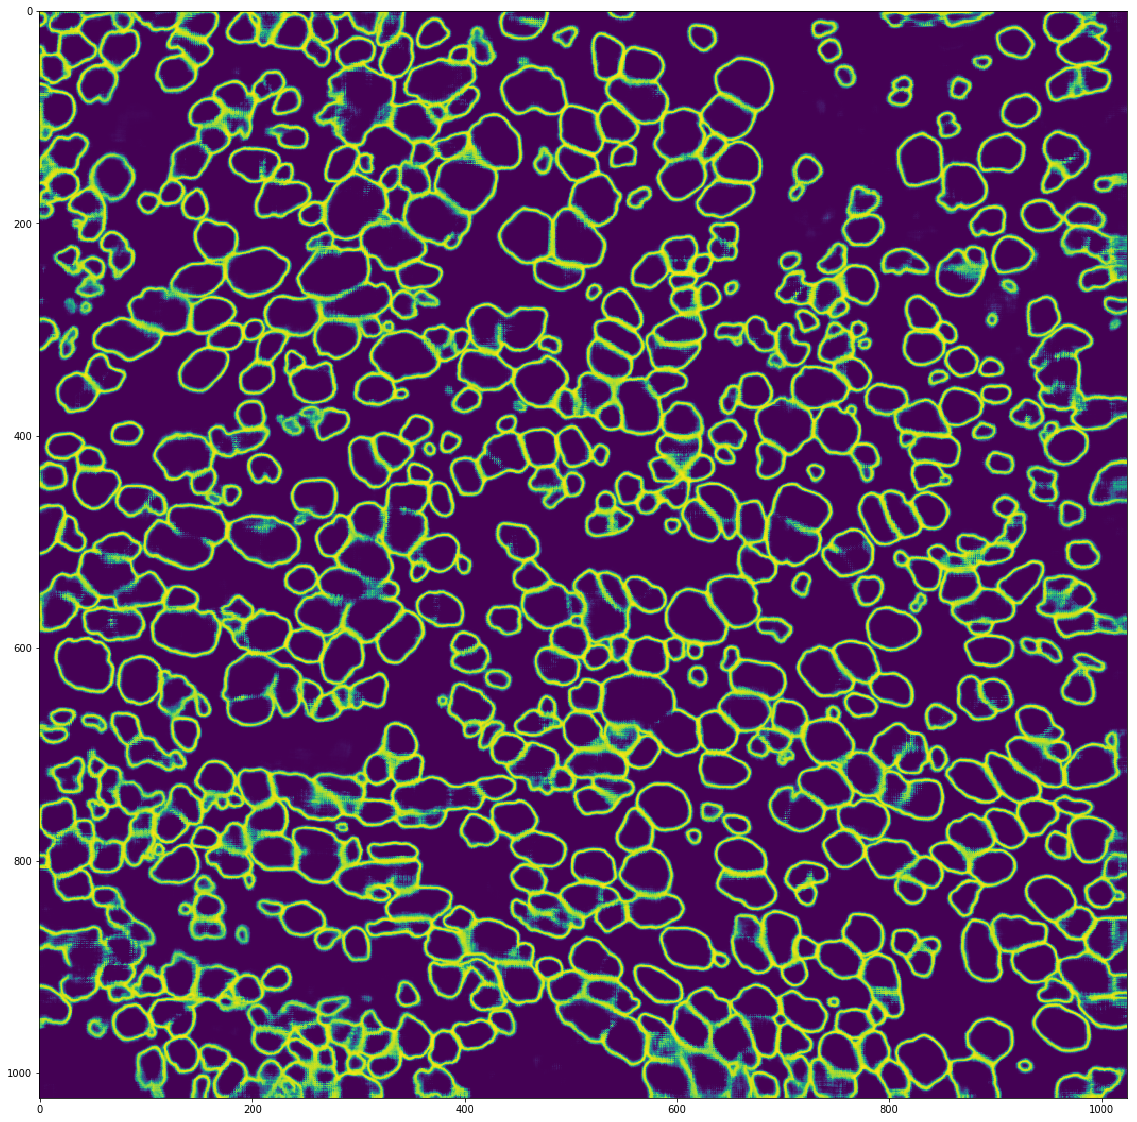

In [37]:
plt.figure(figsize = (20, 20))
# plt.imshow(test_images[2, :, :, 3] - test_2[2, :, :, 3])
# plt.colorbar()
#plt.imshow(test_images[3, :, :, 0])
#plt.imshow(test_images[3, :, :, 1])
plt.imshow(test_images[3, :, :, 0] + test_images[3, :, :, 1])



In [ ]:
# import copy
# test_2 = copy.copy(test_images)
test_2 = np.load('/data/models/' + 'Point1_12_18_3X_interior_save_10' + '_metrics.npy')